Por Alex Wicher, estudiante de la Facultad de Matemática, Astronomía, Física y Computación (FAMAF) para el laboratorio de Redes y Sistemas Distribuidos.

# Análisis de enrutamiento, capa de red, con Simplified LSP.

## Resumen.

En este trabajo se presentara un algoritmo de enrutamiento para la capa de red, por lo tanto, implementados en los "nodos intermediarios" como descriptos en el trabajo anterior "Análisis de control de flujo y congestión, capa de transporte" por Alex Wicher. La idea seria maximizar la utilización de la sub-red, entregando al mayor cantidad de paquetes posibles al destino mediante la seleccion de rutas mas efectiva y eficiente posible. Y proveer enrutamiento para cualquier topologia de red.
El algoritmo de enrutamiento propuesto es una implementación simplificada de LSP (Link State Package) Routing, no considera cambios de topologia, pero provee una plataforma decente para extender el algoritmo a una versión completa de LSP.

## Introducción.

En la mayoría de los sistemas operativos de redes existe la capa de red cuya función principal es enrutar los paquetes en una red y entre distintas redes que pueden usar distintas tecnologías. En este trabajo nos vamos a enfocar en el enrutamiento dentro de una sub-red.

El escenario general del laboratorio consiste en una red de topologia de anillo como se ve en la imagen:

<img src="data/lab4.png" width="800" height="400">

Cada nodo posee una capa simplificada de aplicación y una capa de red con diferentes puertas de enlace:

<img src="data/lab4_1.png" width="800" height="400">

El algoritmo de enrutamiento por defecto en este escenario simplemente enviá todos los paquetes por la compuerta de la derecha, causando una obvia mala utilización de la red, y usando caminos mas largos y costosos de lo necesario.

Existen dos casos:
 + Caso 1: Nodo 0 y 2 enviando al nodo 5. Idealmente vamos a tener:

<img src="data/short.png" width="800" height="400">

 + Caso 2: Todos los nodos enviando al nodo 5. Este escenario es muy similar el primero, idealmente las cargas se van a dividir en dos mitades como en la imagen de arriba.

### Tener en cuenta que la capacidad de cada interfaz es de 1Mbps y cada paquetes pesa aprox. 1Mbps (125000B), la emision de paquetes es aprox. 1 por segundo. Por lo tanto cada interfaz solo puede soportar un stream de paquetes a la vez.

Entonces, teniendo dos emisores con caminos cortos distintos, no deberia haber congestion en ningun buffer con un algoritmo de enrutamiento decente para el caso 1.

## Métodos.

Simplified LSP usa una matriz de adyacencia para representar la sub-red.
* Simplified LSP consiste de pasos muy similares a los vistos en el teórico, vamos a verlo desde la perspectiva de un nodo individual:
    + Primero se mandan paquetes "hello" por todas las compuertas de salida.
    + Si hay otro nodo conectado este mandara "hello_ack".
    + Al recibirse "hello_ack" se registra el par <ID de nodo vecino, puerta de enlace de salida>.
    + Luego se mandan paquetes "echo" a todos los vecinos registrados.
    + Los nodos vecinos al recibir "echo" inmediatamente los devuelven.
    + Al recibir la devolución del "echo" se calcula el delay y con este:
        + Se guarda el dato en una lista de tipo <ID de nodo vecino, costo>.
        + Se modifica la matriz de adyacencia para considerar el costo.
    + Cuando ya se hallan devuelto todos los "echo", se crea un LSP con la lista completa <ID de nodo vecino, costo> y ID propio del nodo.
    + Se hace Flooding corto con el LSP creado.
    + Cuando se recibe un LSP:
        + Este de guarda en una lista <ID de nodo, LSP>.
        + Se modifica la matriz de adyacencia en base a la lista <ID de nodo vecino, costo> que el LSP provee.
        + Si el LSP es viejo o duplicado, se elimina. Si no, se continua el flooding.
    + Cuando la lista <ID de nodo, LSP> de nodo este llena, se corre Dijkstra, dando como resultado las rutas mas cortas a todos los nodos.
    + Se envia un paquete a la aplicación indicando que el nodo esta listo para enrutar paquetes. La aplicación enviá si tiene paquetes que enviar.
    + Cuando el nodo recibe un paquete, ya sea de otro nodo o la capa de aplicación propia del nodo , se calcula la puerta de enlace de salida en base a los datos dados por Dijstra y enviá el paquete por la misma. La compuerta de salida se registra en una lista <ID destino, compuerta> para ahorra procesamiento.

### Flooding corto

Es un tipo de inundación con registro en base de datos de paquetes en donde aquellos paquetes que llegan y ya figuren en la BD, son eliminados. Este algoritmo fue pensado para reducir el tiempo de simulación en redes grandes, ya que causan muchos eventos. Como consecuencia reduce drásticamente la circulación de paquetes en la sub-red. Si se tuviera que usar en la realidad, la confirmación de los paquetes antes de su registro seria una necesidad. Los nodos mantienen un array del tamaño de la sub-red, indice es el ID del nodo, el valor un LSP. Se mantienen siempre el LSP mas nuevo, los viejos y los duplicados se eliminan para que no se propaguen. También tiene un hop counter igual a la cantidad de nodos de la sub-red.

## Resultados.

### Caso 1:

In [42]:
import matplotlib.pyplot as plt  #librería para graficas de python
import numpy  # extiende las librerias de matemática de python
import pandas  #libreria para procesamiento de datos muy usada en la industria
import seaborn  # Extiende las funcionalidades de matplotlib, muy usado en data visualization

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

dataOld = pandas.read_csv('data/lab4_case1_1.csv')
dataNew = pandas.read_csv('data/lab4_case1_2.csv')

dataOld

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,datetime,20220730-16:13:41,NaN,NaN
2,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,datetimef,20220730-161341,NaN,NaN
3,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20220730-16:13:41-21192,runattr,NaN,NaN,network,Network,NaN,NaN


In [43]:
dataNew

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20220730-15:31:43-17600,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20220730-15:31:43-17600,runattr,NaN,NaN,datetime,20220730-15:31:43,NaN,NaN
2,General-0-20220730-15:31:43-17600,runattr,NaN,NaN,datetimef,20220730-153143,NaN,NaN
3,General-0-20220730-15:31:43-17600,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20220730-15:31:43-17600,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
...,...,...,...,...,...,...,...,...
64,General-0-20220730-15:31:43-17600,vector,Network.node[6].net,Delay_per_node,NaN,NaN,2.899816388484 3.899816388484 5.774584855839 6...,2.0002 2.076976868529 2.0002 2.44915151333 2.4...
65,General-0-20220730-15:31:43-17600,vector,Network.node[4].net,packetHops,NaN,NaN,3.860860212075 4.860860212075 6.52702540626 7....,3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 ...
66,General-0-20220730-15:31:43-17600,vector,Network.node[4].net,Delay_per_node,NaN,NaN,3.860860212075 4.860860212075 6.52702540626 7....,2.0002 2.212998860018 2.0002 2.0002 2.42468080...
67,General-0-20220730-15:31:43-17600,vector,Network.node[5].net,packetHops,NaN,NaN,3.899916388484 4.860960212075 4.899916388484 5...,4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 ...


<img src="data/Buf_size_lab4_case1_1.png" width="800" height="400">

### Claro cuello de botella en node 0 cuando se enruta todo por la misma compuerta. Veamos con simplified LSP:

<img src="data/Buf_size_lab4_case1_2.png" width="1200" height="500">

### Todos los numeros de buffer ni siquiera superan mas de 10 paquetes en un mismo momento. Antes eran cerca de 200 para el nodo 0.

196
380


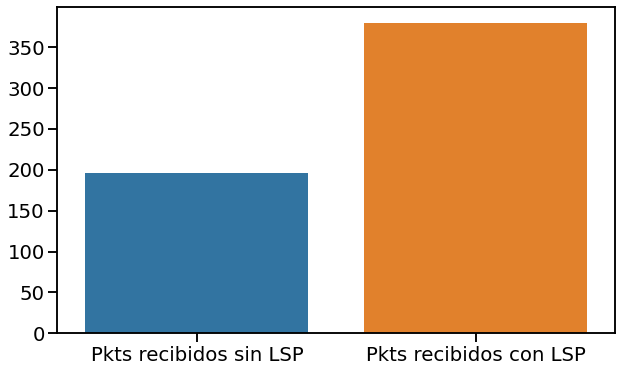

In [44]:
time_pktsO = dataOld['vectime'].loc[[33]].tolist()
packetsO = dataOld['vecvalue'].loc[[33]].tolist()

time_pkts1 = dataNew['vectime'].loc[[46]].tolist()
packets_1 = dataNew['vecvalue'].loc[[46]].tolist()

#dividiendo en listas
time_pktsO = list(map(float, time_pktsO[0].split()))
packetsO = list(map(float, packetsO[0].split()))
time_pkts1 = list(map(float, time_pkts1[0].split()))
packets_1 = list(map(float, packets_1[0].split()))


plt.figure(figsize=(10, 6))
seaborn.barplot(
    x=['Pkts recibidos sin LSP', 'Pkts recibidos con LSP'],
    y=[len(packetsO), len(packets_1)])
print(len(packetsO))
print(len(packets_1))

### Sin congestion y el doble recibidos.

### Caso 2:

In [45]:
import matplotlib.pyplot as plt  #librería para graficas de python
import numpy  # extiende las librerias de matemática de python
import pandas  #libreria para procesamiento de datos muy usada en la industria
import seaborn  # Extiende las funcionalidades de matplotlib, muy usado en data visualization

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

dataOld = pandas.read_csv('data/lab4_case2_1.csv')
dataNew = pandas.read_csv('data/lab4_case2_2.csv')

dataOld

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,datetime,20220730-16:16:49,NaN,NaN
2,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,datetimef,20220730-161649,NaN,NaN
3,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20220730-16:16:49-21457,runattr,NaN,NaN,network,Network,NaN,NaN


In [46]:
dataNew

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,datetime,20220730-15:26:59,NaN,NaN
2,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,datetimef,20220730-152659,NaN,NaN
3,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20220730-15:26:59-17146,runattr,NaN,NaN,network,Network,NaN,NaN



### Veamos todos los nodos enviando al nodo 5 todos ,por una sola compuerta
<img src="data/Buf_size_lab4_case2_1.png" width="1200" height="500">


### Veamos lo mismo pero con LSP:
<img src="data/Buf_size_lab4_case2_2.png" width="1200" height="500">

### La congestion es muy similar , pero en LSP se usan mas buffers por el uso de multiples caminos y por lo tanto compuertas diferentes.

199
398


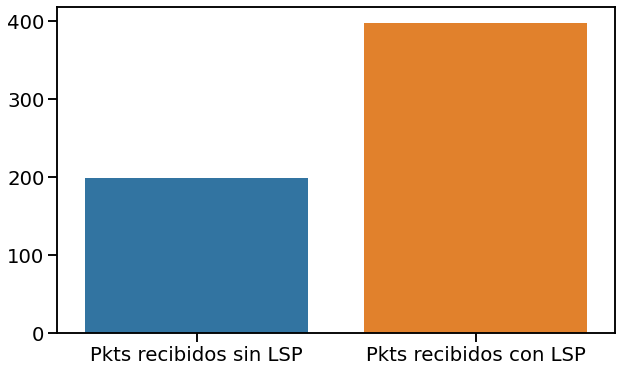

In [47]:
time_pktsO = dataOld['vectime'].loc[[29]].tolist()
packetsO = dataOld['vecvalue'].loc[[29]].tolist()

time_pkts1 = dataNew['vectime'].loc[[42]].tolist()
packets_1 = dataNew['vecvalue'].loc[[42]].tolist()

#dividiendo en listas
time_pktsO = list(map(float, time_pktsO[0].split()))
packetsO = list(map(float, packetsO[0].split()))
time_pkts1 = list(map(float, time_pkts1[0].split()))
packets_1 = list(map(float, packets_1[0].split()))


plt.figure(figsize=(10, 6))
seaborn.barplot(
    x=['Pkts recibidos sin LSP', 'Pkts recibidos con LSP'],
    y=[len(packetsO), len(packets_1)])
print(len(packetsO))
print(len(packets_1))


 Con congestion por la cantidad de emisores a un solo destino, pero el doble de paquetes recibidos con Simplified LSP.


## Discusión.
Como mencionado en el resumen el algoritmo es una versión limitada de LSP Routing. No se emiten LSPs excepto en la inicialización de la sub-red, por lo tanto cambios significativos en la subred no son notificados. No se suma/descuenta peso en la matriz de adyacencia por uso/liberación canales de un nodo, ni se notifica esto al resto de los nodos. No se notifican nodos desconectados a la subred.
Se podrían detectar nodos desconectados, enviando paquetes echo cada un cierto tiempo. Se pueden enviar LSPs por flooding "corto" cada cierto tiempo para notificar de cambios de topologia al resto de la sub-red.
Se puede usar un temporizador por cada compuerta en uso, que mida el tamaño promedio de los paquetes que pasan por la misma. Por ejemplo, si la compuerta 1 del nodo 0 es usada para enviar paquetes de 12500B por 5s, entonces se modifica la matriz de adyacencia para subir el costo al vecino correspondiente a la compuerta, luego se manda LSPs por flooding. Si cae en desuso por tal vez 10s, se baja el costo y se notifica a al subred.

### Consideraciones
Por algunas limitaciones de tiempo y mano de obra, el código del algoritmo no esta idealmente organizado ni optimizado. Si se quisiera extender este algoritmo a una versión completa de LSP routing ,o incluso mas, se debería re-formatear el código y analizar las subrutinas básicas que este realiza para tratar de mejorar la base que se provee.
Idealmente se quiere un código que este bien modularizado y se puedan insertar funcionalidades fácilmente como si fueran solo un modulo mas, sin preocuparme por el resto.
Con respecto a la optimización, en Dijkstra se puede remplazar la cola que se usa para marcar los nodos visitados por otros tipos de colas mucho mas eficientes, como es el popular ejemplo de cola con prioridades usado en OSPF.
Con respecto Flooding corto, este se usa en la practica pero desconozco su precisa denominación (1).


## Referencias.

https://famaf.aulavirtual.unc.edu.ar/course/view.php?id=880
https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm
https://www.geeksforgeeks.org/c-program-for-dijkstras-shortest-path-algorithm-greedy-algo-7/
https://www.geeksforgeeks.org/different-types-of-queues-and-its-applications/
https://prepinsta.com/c-program/types-of-queue/
https://stackoverflow.com/questions/10549604/flooding-algorithm-on-a-network (1)
